## Color cuts, sample selection and Figure of Merit

In this notebook, we make a first attempt to select a sample, based on color cuts, that maximizes the forecasted Figure of Merit for the constraints on the $\Omega_m - \sigma_8$ plane. 

We consider here the constraints from angular galaxy clustering in Fourier space (angular power spectra).

We make many simplifying assumptions, and the analysis is heavily based on that in arXiv: 1712.06211 (BAO sample selection).

We use DESY1 data. We consider four redshift bins in the interval $ z \in [0.6,1.0]$. We apply all the cuts mentioned in the BAO paper, except the color cuts that we want to optimize.  

These cuts are:

Cuts for color outliers:

\begin{eqnarray}
- 1 < g_{auto} - r_{auto} < 3\\
- 1 < r_{auto} - i_{auto} < 2.5 \\
- 1 < i_{auto} - z_{auto} < 1.7 \\
\end{eqnarray}

Completeness:
\begin{equation}
i_{auto} < 22
\end{equation}

Flux:
\begin{equation}
17.5 < i_{auto} < 19.0 + 3.0z
\end{equation}

Quality:
\begin{equation}
flags\_badregion < 4\,\, ; \,\, flags\_gold = 0
\end{equation}

Star-galaxy separation: 
\begin{equation}
spread\_model\_i + (5/3)spreaderr\_model\_i > 0.007
\end{equation}

We also make some coordinate cuts:

\begin{equation}
300 < RA(deg) <99.6 \,\,  \mbox{and}\,\, -40 < DEC(deg) \,\,<-60 
\end{equation}

And:
\begin{equation}
317.5 <RA(deg) <360 \,\,  \mbox{and}\,\, -1.76 <DEC(deg) <1.79
\end{equation}

Let's import the data and make these cuts, to select the sample on which we will further try  to aply color cuts to make a color selection.

In [1]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate 
from code.plot_utils import plot_pretty
from astropy.io import fits
%matplotlib inline
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
Y1 = fits.open('BAO.fits')

print Y1[1].header.keys

<bound method Header.keys of XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   48 / length of dimension 1                          
NAXIS2  =               189944 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   10 / number of table fields                         
TTYPE1  = 'spreaderr_model_i'                                                   
TFORM1  = 'E       '                                                            
TTYPE2  = 'spread_model_i'                                                      
TFORM2  = 'E       '                                                            

In [3]:
z_phot = Y1[1].data['mean_z_bpz']
z_random = Y1[1].data['z_mc_bpz']

i_auto = Y1[1].data['mag_auto_i']
g_auto = Y1[1].data['mag_auto_g']
r_auto = Y1[1].data['mag_auto_r']
z_auto = Y1[1].data['mag_auto_z']
spread_model_i = Y1[1].data['spread_model_i']
speraderr_model_i = Y1[1].data['spreaderr_model_i']
RA = Y1[1].data['ra']
DEC = Y1[1].data['dec']

Start by applying all the Color outliers cuts first, as well as the star-galaxy separation

In [4]:
z_phot_1 = z_phot[((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)&((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)&((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)&((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)&((i_auto)<(19.0+3.0*z_phot))]
z_random_1 = z_random[((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)&((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)&((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)&((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)&((i_auto)<(19.0+3.0*z_phot))]
i_auto_1 = i_auto[((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)&((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)&((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)&((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)&((i_auto)<(19.0+3.0*z_phot))]
r_auto_1 = r_auto[((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)&((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)&((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)&((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)&((i_auto)<(19.0+3.0*z_phot))]
z_auto_1 = z_auto[((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)&((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)&((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)&((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)&((i_auto)<(19.0+3.0*z_phot))]
RA_1 = RA[((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)&((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)&((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)&((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)&((i_auto)<(19.0+3.0*z_phot))]
DEC_1 = DEC[((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)&((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)&((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)&((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)&((i_auto)<(19.0+3.0*z_phot))]

Now coordinate cuts

In [5]:
#mean photometrics 

z_p_1 = z_phot_1[(RA_1>0.0)&(RA_1<99.6)&(DEC_1>-60.0)&(DEC_1<-40.0)] 
z_p_2 = z_phot_1[(RA_1>300.0)&(RA_1<360.0)&(DEC_1>-60.0)&(DEC_1<-4.0)] 
z_p_3 = z_phot_1[(RA_1>317.5)&(RA_1<360.0)&(DEC_1>-1.76)&(DEC_1<1.79)] 

#random photometrics

z_r_1 = z_random_1[(RA_1>0.0)&(RA_1<99.6)&(DEC_1>-60.0)&(DEC_1<-40.0)]
z_r_2 = z_random_1[(RA_1>300.0)&(RA_1<360.0)&(DEC_1>-60.0)&(DEC_1<-4.0)]
z_r_3 = z_random_1[(RA_1>317.5)&(RA_1<360.0)&(DEC_1>-1.76)&(DEC_1<1.79)]

#Right Assecion
RA_11 = RA_1[(RA_1>0.0)&(RA_1<99.6)&(DEC_1>-60.0)&(DEC_1<-40.0)]
RA_12 = RA_1[(RA_1>300.0)&(RA_1<360.0)&(DEC_1>-60.0)&(DEC_1<-4.0)] 
RA_13 = RA_1[(RA_1>317.5)&(RA_1<360.0)&(DEC_1>-1.76)&(DEC_1<1.79)] 

#Declination
DEC_11 = DEC_1[(RA_1>0.0)&(RA_1<99.6)&(DEC_1>-60.0)&(DEC_1<-40.0)]
DEC_12 = DEC_1[(RA_1>300.0)&(RA_1<360.0)&(DEC_1>-60.0)&(DEC_1<-4.0)] 
DEC_13 = DEC_1[(RA_1>317.5)&(RA_1<360.0)&(DEC_1>-1.76)&(DEC_1<1.79)]

# i_mangnitude 
i_1 = i_auto_1[(RA_1>0.0)&(RA_1<99.6)&(DEC_1>-60.0)&(DEC_1<-40.0)]
i_2 = i_auto_1[(RA_1>300.0)&(RA_1<360.0)&(DEC_1>-60.0)&(DEC_1<-4.0)] 
i_3 = i_auto_1[(RA_1>317.5)&(RA_1<360.0)&(DEC_1>-1.76)&(DEC_1<1.79)]

# r_magnitude
r_1 = r_auto_1[(RA_1>0.0)&(RA_1<99.6)&(DEC_1>-60.0)&(DEC_1<-40.0)]
r_2 = r_auto_1[(RA_1>300.0)&(RA_1<360.0)&(DEC_1>-60.0)&(DEC_1<-4.0)]  
r_3 = r_auto_1[(RA_1>317.5)&(RA_1<360.0)&(DEC_1>-1.76)&(DEC_1<1.79)]
# z_magnitude
z_1 = z_auto_1[(RA_1>0.0)&(RA_1<99.6)&(DEC_1>-60.0)&(DEC_1<-40.0)]
z_2 = z_auto_1[(RA_1>300.0)&(RA_1<360.0)&(DEC_1>-60.0)&(DEC_1<-4.0)] 
z_3 = z_auto_1[(RA_1>317.5)&(RA_1<360.0)&(DEC_1>-1.76)&(DEC_1<1.79)]


#=======================================================================================
#=======================================================================================
#Create final arrays

RA_f = np.concatenate((RA_11,RA_12,RA_13))
DEC_f = np.concatenate((DEC_11,DEC_12,DEC_13))

z_ph = np.concatenate((z_p_1,z_p_2,z_p_3))
z_rand = np.concatenate((z_r_1,z_r_2,z_r_3))

i_mag = np.concatenate((i_1,i_2,i_3))
r_mag = np.concatenate((r_1,r_2,r_3))
z_mag = np.concatenate((z_1,z_2,z_3))



###### Plot the distribution of the sample

//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


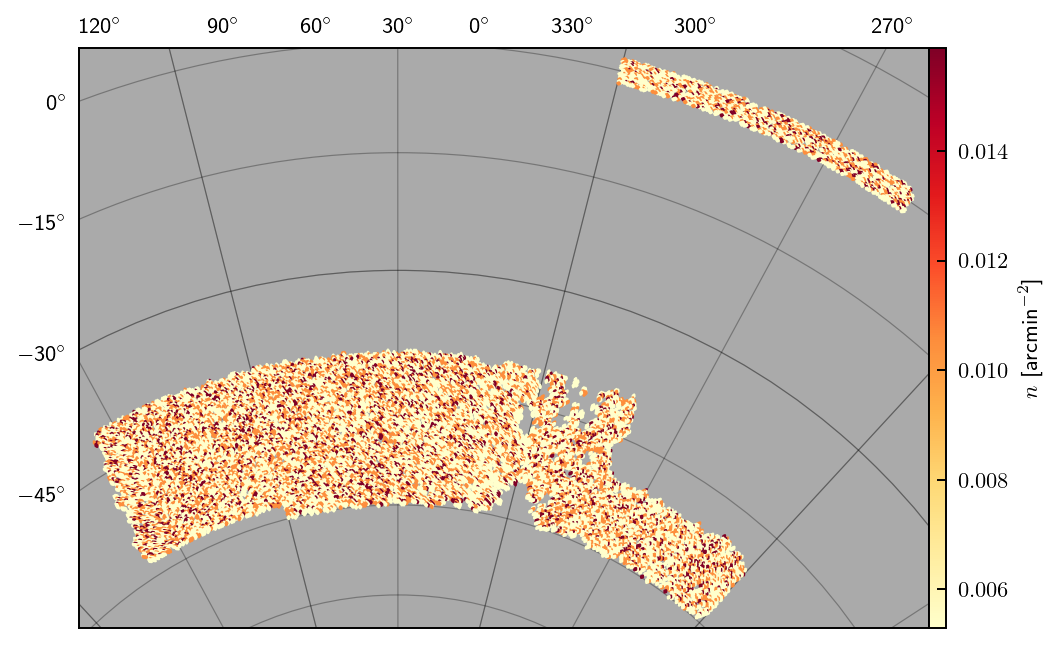

In [6]:
import skymapper as skm
# plot density in healpix cells
nside = 4*64
sep = 4*15


plot_pretty()
fig, ax, proj = skm.plotDensity(RA_f, DEC_f, nside=nside, sep=sep)
sep = 15
meridians = np.arange(-90, 90+sep, sep)
parallels = np.arange(0, 360+2*sep, 2*sep)
skm.setMeridianPatches(ax, proj, meridians, linestyle='-', lw=0.5, alpha=0.3, zorder=2)
skm.setParallelPatches(ax, proj, parallels, linestyle='-', lw=0.5, alpha=0.3, zorder=2)
skm.setMeridianLabels(ax, proj, meridians, loc="left", fmt=skm.pmDegFormatter)
skm.setParallelLabels(ax, proj, parallels, loc="bottom") 

### Color cuts

Next we want to select a red sample for clustering measurements, optimized such that the $\Omega_m - \sigma_8$ plane FoM is maximum. 

Following the BAO selection paper, we impose a color cut of the form:

\begin{equation}
(i_{auto} - z_{auto}) + a_1(r_{auto} - i_{auto}) > a_2
\end{equation}

We want to run a grid of $[a_1,a_2]$ values, define a sample based on color cuts for each pair of values in the grid, calcuate redshift distributions and number of galaxies in each redshift bin and then calculate the Fisher matrix and thus the forecasted figure of merit.

For $a_1$ and $a_2$ let's choose:

\begin{equation} 
a_1 \in [0.5-2.0]
\end{equation}

\begin{equation}
a_2 \in [0.5 - 3.0]
\end{equation}

### Single redshift bin Fisher Matrix

Code that calculates fisher matrix for a single bin. Inputs: photo-z range, normalized redshift distribution of galaxies, bias.


Using the Limber and flat-sky approximations, we model the angular power spectrum in a redshift bin $i$ as:

\begin{equation}
C_\ell^i = \int { dz \frac{H(z)}{c} \frac{W_{i}^2(z)}{\chi^2(z)} P_{NL} \left(k= \frac{\ell+1/2}{\chi(z)};z \right)}
\end{equation}

where the efficiency kernel for galaxy clustering, at a redshift bin $i$, is:

\begin{equation}
W^i(z) = b(z) n^{i}(z),
\end{equation}

$n^{i}(z)$ being the normalized redshift distribution of galaxies inside the redshift bin $i$ and $b(z)$ the (linear)  bias. Here, for simplicity, we adopt $b(z) = 1.6 =$constant.

The Fisher matrix for parameters $\theta_\mu, \theta_\nu$ is given by:


\begin{equation}
F_{\mu\nu} = \sum_{\ell_{min}}^{\ell_{max}} \frac{1}{\sigma_{\ell,i}^2}\frac{\partial C_\ell^i}{\partial \theta_\mu}\frac{\partial C_\ell^i}{\partial \theta_\nu}
\end{equation}

Where:

\begin{equation}
\sigma_{\ell,i} = \delta C_{\ell}^{i} = \sqrt{\frac{2}{f_{sky}(2\ell+1)}}\left(C_\ell^i + \frac{1}{\bar{n}^i} \right)
\end{equation}

where $\bar{n}^i$ the angular number density of galaxies in redshift bin $i$.

For a number of (uncorrelated) bins, the total Fisher matrix is:

\begin{equation}
F_{\mu \nu}^{tot} = \sum_i F_{\mu \nu}^i
\end{equation}

In [7]:
import camb
from camb import model, initialpower

In [8]:
# Now create a class that can create CAMB cosmologies for different matter densities and sigma_8

class Cosmology:
    
    def __init__(self,omega_m,sigma_8,h,z):
        self.omega_m = omega_m
        self.sigma_8 = sigma_8
        self.h = h
        self.z = z
        self.k_max = 10.0
        self.c = 2.99792e+5
        #=========================
        
        cosmo = camb.CAMBparams()
        cosmo.set_cosmology(H0=100*self.h, ombh2=0.049*(self.h**2.0), omch2=(self.omega_m - 0.049)*(self.h**2.0), mnu=0.06, omk=0, tau=0.06)
        cosmo.InitPower.set_params(As=2.0e-9, ns=0.96)
        results = camb.get_results(cosmo)
        cosmo.set_matter_power(redshifts=[0.0], kmax=10.0)
        cambres= camb.get_transfer_functions(cosmo)
        cosmo.NonLinear = model.NonLinear_both
        kh, z, pk = cambres.get_matter_power_spectrum(minkh=1e-3, maxkh=1.0, npoints = 10)
        sigma_8_temp = cambres.get_sigma8()
        As_new  = ((self.sigma_8/sigma_8_temp)**2.0)*(2.0e-9)
        cosmo.InitPower.set_params(As=As_new, ns=0.96)
        cambres = camb.get_results(cosmo)
        backres = camb.get_background(cosmo)

        self.chi = backres.comoving_radial_distance(self.z)
           
        self.PK = camb.get_matter_power_interpolator(cosmo, nonlinear=True, 
                hubble_units=False, k_hunit=False, kmax=self.k_max, zmin = 0.0, zmax=self.z[-1]) 
        
        self.H_z = (backres.hubble_parameter(self.z))/self.c #Hubble parameter in 1/Mpc 

In [9]:
# Instantize cosmologies 

omega_m = 0.31
sigma_8 = 0.81
h = 0.675
alpha_om  = omega_m/10.0
alpha_sig = sigma_8/10.0

#==========================
nz = 1000 #number of steps to use for the radial/redshift integration

zarray = np.linspace(0,4.0,nz)
z = zarray[1:-1]

cosmo_fid = Cosmology(omega_m, sigma_8, h, z)
cosmo_1 = Cosmology(omega_m + alpha_om, sigma_8, h, z)
cosmo_2 = Cosmology(omega_m - alpha_om, sigma_8, h, z)
cosmo_3 = Cosmology(omega_m, sigma_8 + alpha_sig, h, z)
cosmo_4 = Cosmology(omega_m, sigma_8 - alpha_sig, h, z)

In [22]:
def cosmoselector(omega, sigma):
    #function that selects cosmology
    
    omfid = 0.31
    sigfid = 0.81
    
    cosmo_dict = {'cosmo_fid': cosmo_fid,
                  'cosmo_1' : cosmo_1,
                  'cosmo_2' : cosmo_2,
                  'cosmo_3' : cosmo_3,
                  'cosmo_4' : cosmo_4}
    
    
    if (omega==omfid):
        if (sigma == sigfid):
            cosm_sel = cosmo_dict['cosmo_fid']
        elif (sigma > sigfid):
            cosm_sel = cosmo_dict['cosmo_3']
        else:
            cosm_sel = cosmo_dict['cosmo_4']
    elif (omega > omfid): 
        cosm_sel = cosmo_dict['cosmo_1']
    else:
        cosm_sel = cosmo_dict['cosmo_2']
        
    
    return cosm_sel 

In [23]:
# Function that calculates C_l,i

def C_l_i(bias, n_z, Omega_m_var , sig_8_var):
    """
    Function that calculates the C_l between two bins 
    -----------------
    Inputs:
    bias : bias - constant or function
    n_z : redshift distribution at a redshift bin
    Omega_m_var: Omega matter - can change
    sig_8_var : Sigma_8 parameter - can change
    --------------
    Returns:
    ls and C_l betwenn two bins, i and j. It is the auto spectrum if i=j
    """
    # Constant
    h = 0.675
    c = 2.99792e+5
    
    #======================================
    #====================================================================================
    #====================================================================================
    # Selecting cosmology
    
    cosmo = cosmoselector(Omega_m_var, sig_8_var)
    
    #====================================================================================
    #====================================================================================
    #Redshift range for calculations and integration
    
    nz = 1000 #number of steps to use for the radial/redshift integration
    kmax=10.0  #kmax to use

    zarray = np.linspace(0,4.0,nz)
    dzarray = (zarray[2:]-zarray[:-2])/2.0
    zarray = zarray[1:-1]
    
    
    #Calculate square of the window function

    W_sq = (bias*n_z)**2.0
    
    
    #====================================================================================
    #====================================================================================
    #Calculate Hubble parameter and comoving distance
    
    Hubble = cosmo.H_z
    
    # Get comoving distance - in Mpc/h
    chis = cosmo.chi
    
    #========================================================
    # Get the full prefactor of the integral
    prefact = W_sq*Hubble/(chis**2.0)
    #====================================================================================
    
    #===================================================================================
    #===================================================================================
    #Do integral over z
    
    ls_lin = np.linspace(1.0, 3.0, 50, dtype = np.float64)
    ls = 10.0**ls_lin
    
    c_ell=np.zeros(ls.shape)
    w = np.ones(chis.shape) #this is just used to set to zero k values out of range of interpolation
    for i, l in enumerate(ls):
        k=(l+0.5)/chis
        w[:]=1
        w[k<1e-4]=0
        w[k>=kmax]=0
        c_ell[i] = np.dot(dzarray, w*cosmo.PK.P(zarray, k, grid=False)*prefact)
    
    #===================================================================================
    # Retrurn the array of C_ell
    
    return ls, c_ell



#===================================================================================
# Here are the derivatives with respect to matter density and sigma_8
#===================================================================================

def matter_der_C_l_i(bias, n_z, Omega_m , sig_8):
    """
    Function that calculates the derivative of C_l with respect to matter between two bins 
    -----------------
    Inputs:
    z_i : Lower limit of the redshift bin
    z_f : Upper limit of the redshift bin
    bias : the linear galaxy bias
    n_z : the normalized redshift distribution
    Omega_m: Omega matter
    sig_8: Sigma_8 parameter
    
    ---------------
    Returns:
    derivative w/r to matter of C_l betwenn two bins, i and j
    """
    alpha = Omega_m/10.0
    
    C_mat_1 = C_l_i(bias, n_z, Omega_m+alpha , sig_8)[1]
    C_mat_2 = C_l_i(bias, n_z, Omega_m-alpha , sig_8)[1]
    
    mat_der = (C_mat_1 - C_mat_2)/(2.0*alpha)
    return mat_der
    
    
    #===================================================================================
    
def sigma_der_C_l_i(bias, n_z, Omega_m , sig_8):
    """
    Function that calculates the derivative of C_l with respect to sigma_8 between two bins 
    -----------------
    Inputs:
    bias : the linear galaxy bias
    n_z : the normalized redshift distribution
    Omega_m: Omega matter
    sig_8: Sigma_8 parameter
    ---------------
    Returns:
    derivative w/r to matter of C_l betwenn two bins, i and j
    """
    
    alpha = sig_8/10.0
    
    C_sig_1 = C_l_i(bias, n_z, Omega_m, sig_8+alpha)[1]
    C_sig_2 = C_l_i(bias, n_z, Omega_m , sig_8-alpha)[1]
    
    sig_der = (C_sig_1 - C_sig_2)/(2.0*alpha)
    return sig_der

In [24]:
from scipy.interpolate import UnivariateSpline

def Fish_single_bin(z_mean, bias, n_z, f_sky, N_gal):
    """
    Calculates and returns the Fisher matrix for a single bin
    ----------------------------------------
    Inputs:
    z_mean : mean redshift of the bin
    bias : bias - function or constant
    n_z : redshift distribution of the bin
    f_sky : fraction of the sky the survey covers 
    N_gal : number of galaxies in the bin
    
    ---------------------------------------
    Outputs:
    Fisher matrix for a single bin
    """
    
    
    Omega_m = 0.31
    sigma_8 = 0.81
    h = 0.675
    
    #Setting up cosmology - need to calculate chis
    
    # Setting up cosmology
    
    cosmo = camb.CAMBparams()
    cosmo.set_cosmology(H0=67.5, ombh2=0.049*(h**2.0), omch2=(Omega_m - 0.049)*(h**2.0), mnu=0.06, omk=0, tau=0.06)
    backres = camb.get_background(cosmo)
    #=============================================================
    
    #=============================================================
    
    #Redshift range for calculations and integration
    
    nz = 1000 #number of steps to use for the radial/redshift integration
    kmax=10.0  #kmax to use

    zarray = np.linspace(0,4.0,nz)
    dzarray = (zarray[2:]-zarray[:-2])/2.0
    zarray = zarray[1:-1]
    
    #==============================================================================
    # calculation of l_max
    chi_mean = backres.comoving_radial_distance(z_mean)/h   # comoving distance corresponding to the mean redshift of the bin
    k_cutoff= 0.2*h #Cutoff scale in  Mpc^{-1}
    l_max = int(round(chi_mean*k_cutoff))
    
    #==============================================================================
    #==============================================================================
    #Calculation of the angular number density galaxies / steradian
    
    ster = f_sky*(4.0*np.pi)
    n_bin = N_gal/ster
    
    #===============================================================================
    # Now take the ls, C_ls and the derivatives of the C_ls - then keep only up to lmax
    ell_lin = np.linspace(1.0, 3.0, 50, dtype = np.float64)
    
    C_ell_1 = C_l_i(bias, n_z, Omega_m , sigma_8)[1]
    dC_ldOm_1 = matter_der_C_l_i( bias, n_z, Omega_m , sigma_8)
    dC_ldsig8_1 = sigma_der_C_l_i( bias, n_z, Omega_m , sigma_8)
    
    for s in range(0,np.size(dC_ldOm_1)):
        if (np.sign(dC_ldOm_1[s])>=0.0):
            l_break = 0.5*(ell_lin[s]+ell_lin[s-1])
            break
            
    ls = np.arange(10,1000, dtype=np.float64) 
    
    C_ell = np.zeros(np.size(ls))
    dC_ldOm = np.zeros(np.size(ls))
    dC_ldsig8 = np.zeros(np.size(ls))
    #====================================================================
    
    C_l_matr_interp  = UnivariateSpline(ell_lin, np.log10(C_ell_1+ 1.0e-20))
    C_omeg_interp = UnivariateSpline(ell_lin, np.log10(abs(dC_ldOm_1+1.0e-20)))
    C_sig_interp = UnivariateSpline(ell_lin, np.log10(dC_ldsig8_1+1.0e-20))
    for k, l in enumerate(ls):
        ell = np.log10(float(l))
        C_ell[k]  = 10.0**(C_l_matr_interp(ell))
        dC_ldsig8[k] = 10.0**(C_sig_interp(ell))
        if (ell < l_break):
            dC_ldOm[k] = -(10.0**C_omeg_interp(ell))
        else: 
            dC_ldOm[k] = (10.0**C_omeg_interp(ell))
            
    
    ls = ls[:l_max-9]
    C_ell = C_ell[:l_max-9]
    dC_ldOm = dC_ldOm[:l_max-9]
    dC_ldsig8 = dC_ldsig8[:l_max-9]
    
    #Create arrays with sigma^2
    sigma_sq = (2.0/(f_sky*(2.0*ls + 1.0)))*((C_ell + 1.0/n_bin )**2.0)
    
    #===============================================================================
    #===============================================================================
    # Calculation of the elements of the Fisher matrix
    Fish = np.zeros([2,2])
    
    # 0 = matter, 1 = sigma_8
    
    Fish[0,0] = sum((1.0/sigma_sq)*(dC_ldOm**2.0)) 
    Fish[1,1] = sum((1.0/sigma_sq)*(dC_ldsig8**2.0)) 
    Fish[0,1]=Fish[1,0]= sum((1.0/sigma_sq)*(dC_ldOm*dC_ldsig8))
    
    
    return Fish

#### FoM in the grid

In [35]:
from scipy.interpolate import UnivariateSpline as spl
#============================================================
bias = 1.6
f_sky = 1318.0/41253.0

#============================================================
#a_1 range for the grid
a_1_gr = np.linspace(0.5,2.0,40)
#a_2 range for the grid
a_2_gr = np.linspace(0.5,3.0,40)

size = np.size(a_1_gr)  # size of a_1_gr has to be the same as the size of a_2_gr
#============================================================
# Initialize matrix
FoM = np.zeros([size,size])

#============================================================
numz = 1000 #number of steps to use for the radial/redshift integration
zarray = np.linspace(0.0,4.0,numz)
z = zarray[1:-1]
#============================================================

for i in range(0,size):
    print(i)
    a_1_t = a_1_gr[i]
    for j in range(0,size):
        a_2_t = a_2_gr[j]
        
        
        #Now apply to the sample the cuts for these values of a_1, and a_2
        z_ph_temp = z_ph[(((i_mag-z_mag)+a_1_t*(r_mag-i_mag))>a_2_t)]
        z_rand_temp = z_rand[(((i_mag-z_mag)+a_1_t*(r_mag-i_mag))>a_2_t)]
        
        
        Fish_mat  = 0.0 # initalize fisher matrix
        #Create four bins and calculate Fisher matrix in each of them
        for k in range(0,4):
            z_i = 0.6 + k*0.1  # lower redshift limit of the bin
            z_f = 0.6 + (k+1)*0.1  # upper redshift limit of the bin
            
            bin_z = z_rand_temp[(z_ph_temp>z_i)&(z_ph_temp<z_f)]  #select the galaxies with true redshifts inside the phot-z limits 
           
            if (np.size(bin_z)>0.0):
                mean_z = np.mean(bin_z)   #mean redshift of the bin
                N_gal = 64.0*np.size(bin_z)  #number of galaxies in the bin. note: here multiplied by 64
                #because i have used a sample which is 1/64 of the total
            
                y_like, x_like = np.histogram(bin_z, bins=200, normed=True) # take a histogram for the redshift distribution 
                x_like = x_like[:-1]
            
                bin_sp = spl(x_like,y_like,s=0.0, ext=1)     #Interpolate 
                n_z = bin_sp(z)   # this is the normalized n(z) in the range (0.0,4.0)
            
                Fish_mat += Fish_single_bin(mean_z, bias, n_z, f_sky, N_gal)
            else:
                Fish_mat += np.array([[1.0e-20, 1.0e-20], [1.0e-20, 1.0e-20]])
            
        
        
        FoM[i][j] = np.sqrt(np.linalg.det(Fish_mat))
            
            
        
FoM_matr = np.matrix.transpose(FoM)
FoM_matr = FoM_matr/np.max(FoM_matr)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


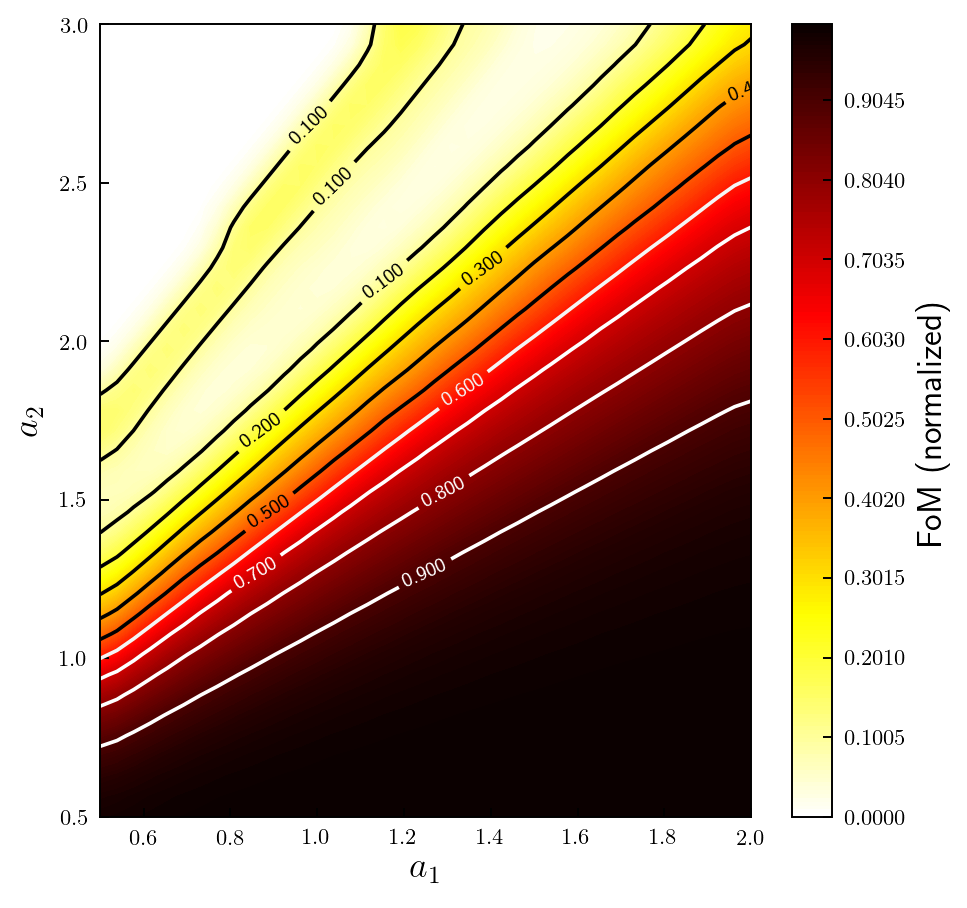

In [73]:
import scipy.ndimage

def FoM_return(a_1,a_2):
    FoMino = FoM_matr
    return FoMino


plot_pretty() 
fig = plt.figure(figsize = (6,6))

a_1, a_2 = np.meshgrid(a_1_gr, a_2_gr)
FoM_pr = FoM_return(a_1, a_2)

FoM_pr = scipy.ndimage.gaussian_filter(FoM_pr, 1)

#image = plt.pcolormesh(a_1, a_2, FoM_pr , cmap=plt.cm.hot_r)
levels = np.linspace(0.0,1.0,200)
image = plt.contourf(a_1, a_2, FoM_pr , levels=levels, cmap=plt.cm.hot_r)
C = plt.contour(a_1, a_2, FoM_pr, 10,  colors=('k', 'k', 'k', 'k','k', 'whitesmoke', 'w', 'w','w','w'), linestyle ='--',  linewidth=.5)
plt.clabel(C, inline=2, fontsize=8)


#plt.xscale('log');plt.yscale('log')

plt.xlabel("$a_1$", fontsize=15)
plt.ylabel("$a_2$", fontsize=15)


plt.xlim(0.5,2.0)
plt.ylim(0.5,3.0)



cbar = plt.colorbar(image, orientation='vertical')
cbar.set_label('FoM (normalized)', fontsize=14)

plt.savefig('FoM_colorcuts.pdf')
plt.show() 



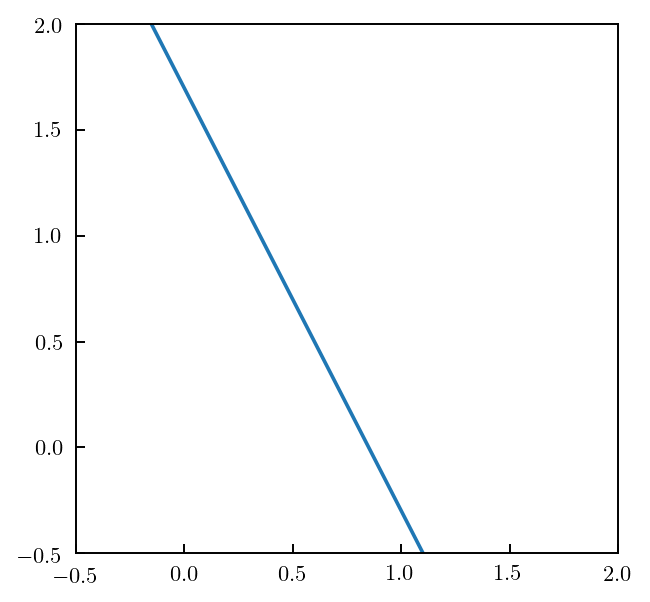

In [37]:
a_1_like = 2.0
a_2_like = 1.7

x = np.linspace(-0.5,2.0,100)
y = a_2_like-a_1_like*x

fig = plt.figure(figsize = (4,4))
plt.plot(x,y)

plt.xlim(-0.5,2.0);plt.ylim(-0.5,2.0)
plt.show()